In [59]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from pathlib import Path
import datetime as dt
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [90]:
plt.rcParams["figure.figsize"] = (22,12)


In [2]:
# Load .env enviroment variables
load_dotenv()


True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [4]:
start_date = pd.Timestamp("2017-05-19", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-19", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["GME"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"


df_gamestop_1 = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Preview DataFrame
df_gamestop_1.head()

GME                                 
                            open     high    low   close   volume
time                                                             
2017-05-19 00:00:00-04:00  23.80  24.3050  23.58  24.220  2087442
2017-05-22 00:00:00-04:00  24.35  24.5995  24.04  24.060  2206389
2017-05-23 00:00:00-04:00  24.37  24.3700  22.63  22.660  5162704
2017-05-24 00:00:00-04:00  22.61  22.8700  22.43  22.715  2175144
2017-05-25 00:00:00-04:00  23.64  23.6700  22.73  23.630  5911630

In [55]:
df_gamestop_1.index = df_gamestop_1.index.values.astype('datetime64[D]')
df_gamestop_1.index = df_gamestop_1.index.set_names(['Date'])
df_gamestop_1.tail()

GME                            
            open  high    low close   volume
Date                                        
2020-05-13  4.54  4.54  4.070  4.20  2820213
2020-05-14  4.15  4.19  3.960  4.14  1937248
2020-05-15  4.05  4.45  4.041  4.23  1827240
2020-05-18  4.40  4.63  4.360  4.57  2227162
2020-05-19  4.58  4.75  4.370  4.44  1783139

In [56]:
df_gamestop_1.to_csv("df_gamestop_1.csv")

In [57]:
MC_ten_year_1 = MCSimulation(
    portfolio_data = df_gamestop_1,
    weights = [1],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

In [58]:
MC_ten_year_1.portfolio_data.head()

GME                                              
             open     high    low   close   volume daily_return
Date                                                           
2017-05-19  23.80  24.3050  23.58  24.220  2087442          NaN
2017-05-22  24.35  24.5995  24.04  24.060  2206389    -0.006606
2017-05-23  24.37  24.3700  22.63  22.660  5162704    -0.058188
2017-05-24  22.61  22.8700  22.43  22.715  2175144     0.002427
2017-05-25  23.64  23.6700  22.73  23.630  5911630     0.040282

In [9]:
MC_ten_year_1.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.034308,0.976376,1.071438,0.965070,0.962591,0.972064,1.020932,0.994962,0.950823,1.088529,...,0.960827,1.016333,0.974937,1.033443,1.019217,1.064647,1.037921,1.032855,0.999772,1.026685
2,0.986616,0.964114,1.040213,0.932728,1.041317,0.928583,1.017987,0.990643,0.913219,1.096243,...,0.970828,1.036196,0.977851,1.004364,1.071585,1.080264,1.084327,1.012047,1.006616,0.985782
3,1.042040,0.924100,0.934734,0.923527,1.124884,0.951487,1.030114,0.973758,0.922658,1.137022,...,0.993708,1.140254,0.927239,1.013717,1.139782,1.099866,1.035817,1.109106,1.029407,0.996664
4,1.092979,0.872956,0.907488,0.900286,1.206807,0.964676,1.037329,1.007093,0.980046,1.087147,...,0.982519,1.184051,0.999316,1.002030,1.121062,1.132201,1.036677,1.158399,1.014423,0.985714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.018974,0.000222,0.015537,0.000723,0.007825,0.008053,0.104111,0.001258,0.000290,0.000550,...,0.055512,0.846460,0.004323,0.006030,0.000647,0.008454,0.055748,0.002290,0.001525,0.001186
2517,0.021218,0.000211,0.015355,0.000703,0.007448,0.007757,0.100865,0.001282,0.000307,0.000545,...,0.057896,0.820790,0.004218,0.005919,0.000640,0.008023,0.056318,0.002404,0.001520,0.001166
2518,0.020101,0.000216,0.015324,0.000734,0.007507,0.007446,0.100509,0.001266,0.000305,0.000572,...,0.058407,0.812540,0.004254,0.005777,0.000652,0.007894,0.057715,0.002158,0.001552,0.001111
2519,0.019401,0.000217,0.015302,0.000747,0.007123,0.007432,0.104493,0.001205,0.000298,0.000550,...,0.060857,0.787106,0.004733,0.005547,0.000661,0.007785,0.053937,0.002056,0.001592,0.001143


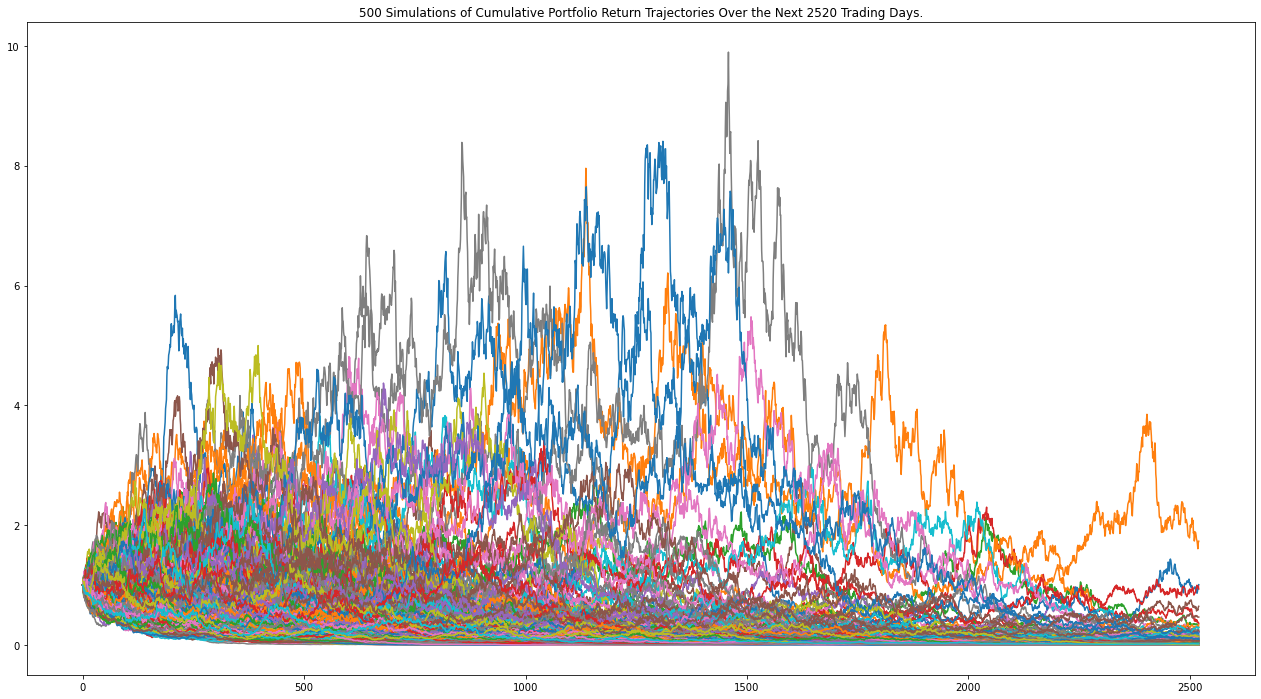

In [91]:
Sim_plot_prevolatility = MC_ten_year_1.plot_simulation()

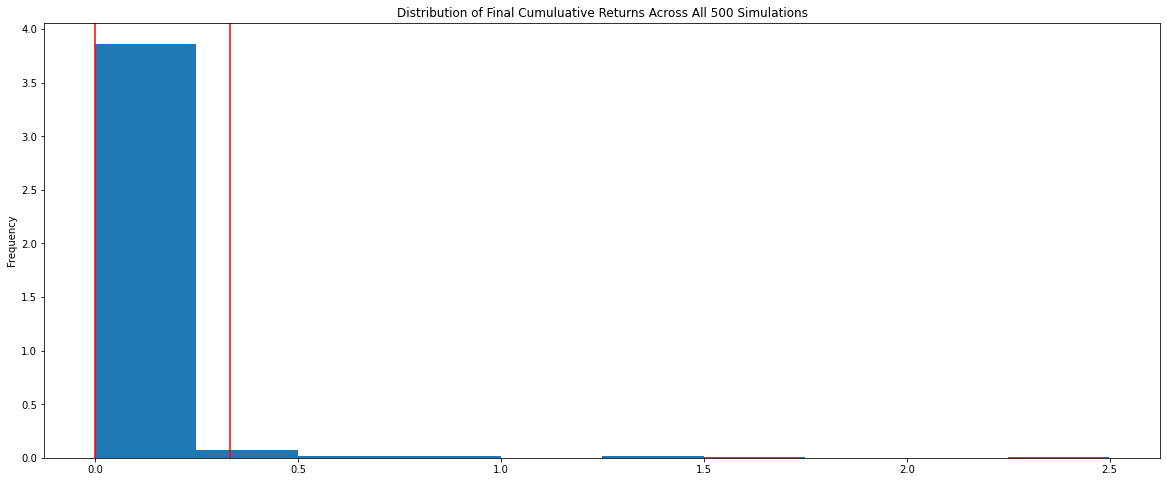

In [41]:
dist_plot_1 = MC_ten_year_1.plot_distribution()

In [12]:
tbl_1 = MC_ten_year_1.summarize_cumulative_return()

print(tbl_1)

count           500.000000
mean              0.037869
std               0.174545
min               0.000014
25%               0.000734
50%               0.003234
75%               0.013946
max               2.499355
95% CI Lower      0.000055
95% CI Upper      0.332504
Name: 2520, dtype: float64


In [13]:

start_date = pd.Timestamp("2018-05-19", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-19", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["GME"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"


df_gamestop_2 = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Preview DataFrame
df_gamestop_2.head()



GME                                
                            open    high    low   close   volume
time                                                            
2018-05-21 00:00:00-04:00  12.52  12.885  12.49  12.765  4690915
2018-05-22 00:00:00-04:00  12.78  12.910  12.54  12.615  4030010
2018-05-23 00:00:00-04:00  12.54  12.750  12.44  12.710  2822301
2018-05-24 00:00:00-04:00  12.58  12.780  12.45  12.730  2678786
2018-05-25 00:00:00-04:00  12.75  12.800  12.58  12.640  2170417

In [61]:


df_gamestop_2.index = df_gamestop_2.index.values.astype('datetime64[D]')
df_gamestop_2.index = df_gamestop_2.index.set_names(['Date'])
df_gamestop_2.tail()

GME                                    
              open      high     low    close   volume
Date                                                  
2021-05-13  147.81  169.9500  146.43  164.999  8604101
2021-05-14  161.08  166.4700  156.22  159.910  4123856
2021-05-17  159.92  182.5000  159.00  180.505  7193150
2021-05-18  174.70  189.2000  168.27  180.574  7540252
2021-05-19  172.73  178.9799  164.15  168.839  4603845

In [62]:
df_gamestop_2.to_csv("df_gamestop_2.csv")

In [65]:
MC_ten_year_2 = MCSimulation(
    portfolio_data = df_gamestop_2,
    weights = [1],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

In [66]:
GME_returns = MC_ten_year_2.portfolio_data

In [67]:
GME_returns.head()

GME                                             
             open    high    low   close   volume daily_return
Date                                                          
2018-05-21  12.52  12.885  12.49  12.765  4690915          NaN
2018-05-22  12.78  12.910  12.54  12.615  4030010    -0.011751
2018-05-23  12.54  12.750  12.44  12.710  2822301     0.007531
2018-05-24  12.58  12.780  12.45  12.730  2678786     0.001574
2018-05-25  12.75  12.800  12.58  12.640  2170417    -0.007070

In [68]:
GME_daily_return = GME_returns['GME']['daily_return'] 

In [69]:
GME_daily_return

Date
2018-05-21         NaN
2018-05-22   -0.011751
2018-05-23    0.007531
2018-05-24    0.001574
2018-05-25   -0.007070
                ...   
2021-05-13    0.141783
2021-05-14   -0.030843
2021-05-17    0.128791
2021-05-18    0.000382
2021-05-19   -0.064987
Name: daily_return, Length: 755, dtype: float64

In [70]:
GME_daily_return = GME_daily_return.dropna()

GME_daily_return.isnull().sum()

0

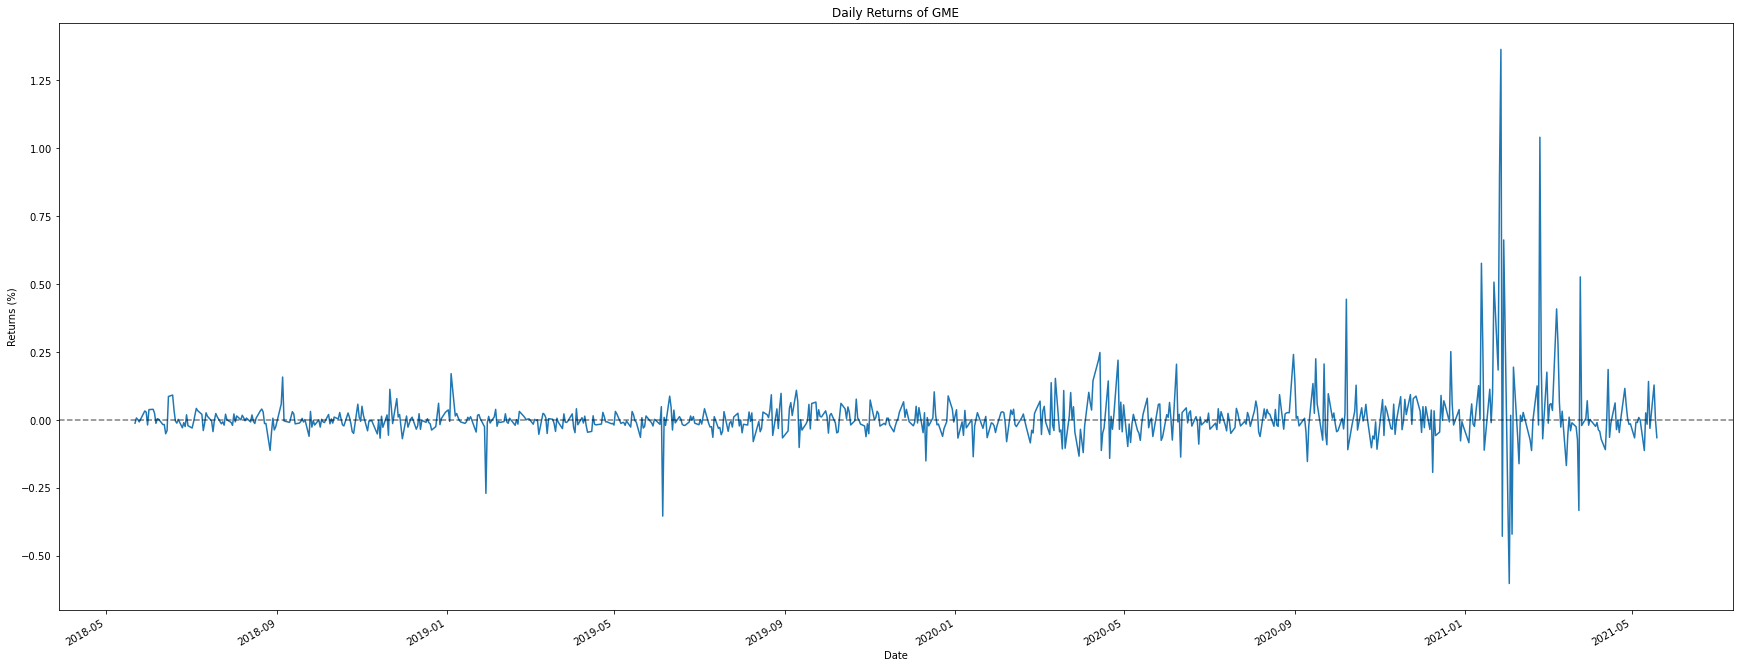

In [77]:
#GME daily returns plot

GME_return_plt = GME_daily_return.plot(figsize=(30,12), title='Daily Returns of GME')
GME_return_plt.set(ylabel='Returns (%)')

plt.axhline(y=0.0, color='k', alpha=0.5, linestyle='--')  
plt.show()

In [17]:
MC_ten_year_2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000
1,0.808757,0.912390,1.035072,1.075662,0.934606,1.183824,1.075993,1.160847,1.200514,1.090142,...,0.977544,0.862292,0.956392,0.700624,0.886476,1.014679,8.220365e-01,1.101802,1.078710,0.792057
2,0.918366,0.935707,0.892002,1.061588,0.954321,1.267092,0.838298,0.883996,1.105994,1.119896,...,1.027685,0.842523,1.156719,0.599448,0.763343,0.869249,9.750572e-01,1.074499,1.206064,0.677601
3,0.912893,1.029284,0.988115,0.914511,0.970914,1.278499,0.933383,0.920013,1.253186,0.991246,...,1.063470,0.864905,1.556631,0.708249,0.913512,0.737656,9.081271e-01,0.887204,1.261642,0.649093
4,0.966889,1.036362,0.722326,0.988840,0.944270,1.315963,0.938674,1.076498,1.301751,0.930195,...,0.982988,0.779294,1.779309,0.819838,0.949526,0.630153,7.851518e-01,0.801306,1.567216,0.691517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,166789.372855,183467.413452,0.219380,42196.360245,0.413944,2560.316558,4410.538067,25268.430003,1223.192998,42.190181,...,0.273069,0.021680,11558.446245,17.457123,149141.375897,22.272251,3.892925e+06,738.913405,33.332031,0.996566
2517,179475.692807,188035.907258,0.235972,41292.414933,0.473422,2535.479271,4503.067325,23436.007503,1427.465626,43.379356,...,0.196546,0.020895,12498.665819,20.148938,123577.907645,24.105217,3.593321e+06,694.943331,29.633474,1.084885
2518,205470.517151,213933.429923,0.203767,38419.999452,0.492825,2299.922561,4938.769200,24390.701686,1396.788956,50.629292,...,0.212691,0.020870,9484.200557,16.888918,103028.285783,22.474742,3.503906e+06,721.087664,31.388940,1.154495
2519,205615.561199,223473.806008,0.168147,37397.739313,0.604185,2427.707852,5500.842457,24943.492323,1505.948119,47.264076,...,0.204562,0.019818,10873.828064,18.880230,124961.625723,18.848892,3.710667e+06,780.361308,29.264379,0.990503


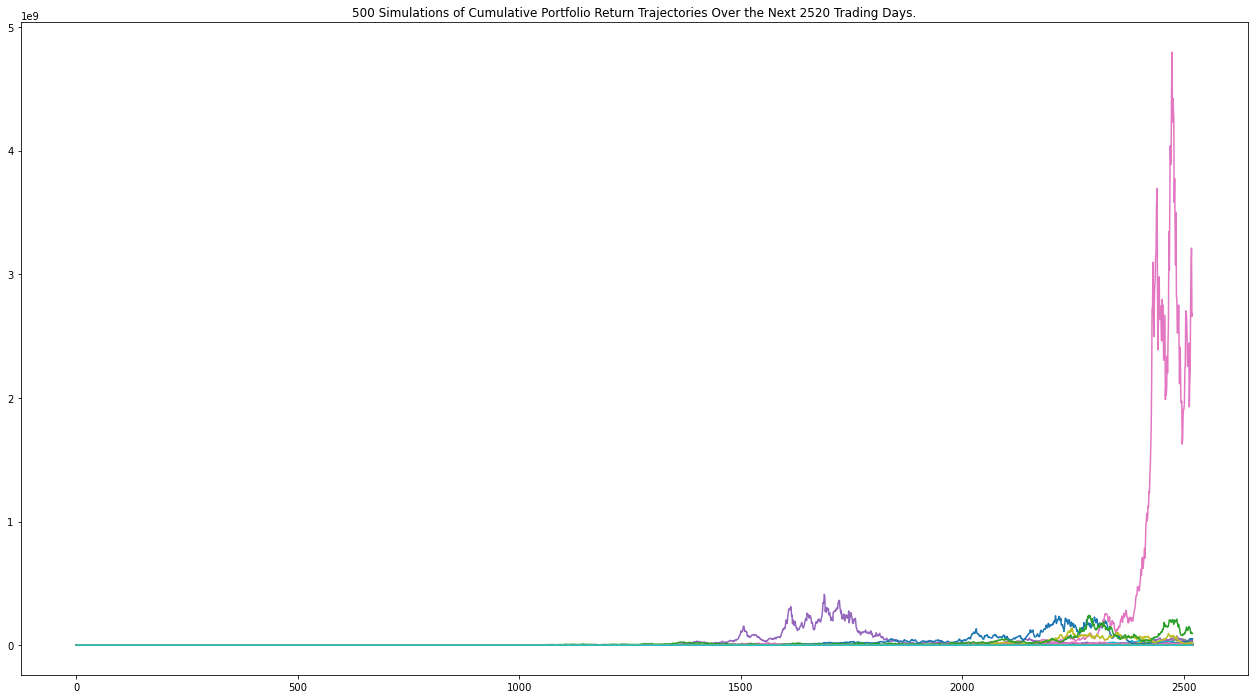

In [147]:
Sim_plot_postvolatility = MC_ten_year_2.plot_simulation()
plt.savefig("foo.png")

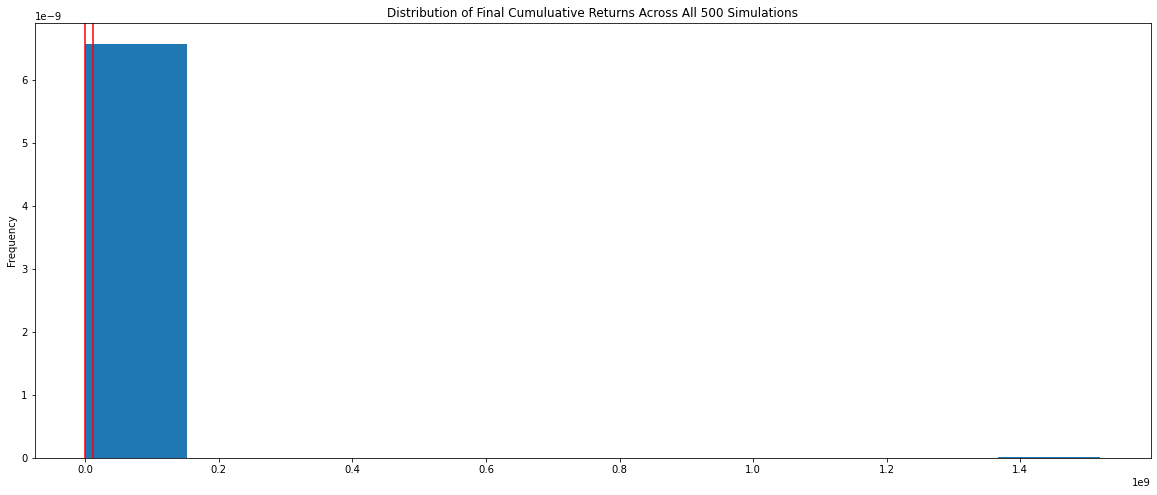

In [42]:
dist_plot_2 = MC_ten_year_2.plot_distribution()

In [20]:
tbl_2 = MC_ten_year_2.summarize_cumulative_return()

print(tbl_2)

count           5.000000e+02
mean            4.226945e+06
std             6.831417e+07
min             9.462388e-06
25%             6.473263e+00
50%             3.991133e+02
75%             1.397982e+04
max             1.519154e+09
95% CI Lower    1.398876e-03
95% CI Upper    1.143121e+07
Name: 2520, dtype: float64


In [25]:
#Import Twitter data for GME mentions 

twitter_data_path = Path("twitter_data_2021.csv")

twitter_data = pd.read_csv(twitter_data_path, parse_dates=True, infer_datetime_format=True)

twitter_data['Date']=pd.to_datetime(twitter_data['Date'])

twitter_data = twitter_data.set_index('Date')

twitter_data.tail()



,gamestock,gamestonk,gme,r/wallstreetbets,total_tweets
Date,,,,,
2021-05-15,0,0,0,0,0
2021-05-16,0,0,0,0,0
2021-05-17,0,0,0,0,0
2021-05-18,0,0,0,0,0
2021-05-19,0,0,0,0,0


In [60]:
import datetime as dt

df_gamestop_2.index = df_gamestop_2.index.values.astype('datetime64[D]')
df_gamestop_2.index = df_gamestop_2.index.set_names(['Date'])
df_gamestop_2.tail()

GME                                    
              open      high     low    close   volume
Date                                                  
2021-05-13  147.81  169.9500  146.43  164.999  8604101
2021-05-14  161.08  166.4700  156.22  159.910  4123856
2021-05-17  159.92  182.5000  159.00  180.505  7193150
2021-05-18  174.70  189.2000  168.27  180.574  7540252
2021-05-19  172.73  178.9799  164.15  168.839  4603845

In [78]:
Social_GME_data = pd.merge(twitter_data, df_gamestop_2['GME'], how='outer', on='Date')

Social_GME_data = Social_GME_data.drop(['gamestock','gamestonk','gme','r/wallstreetbets'], axis =1)

Social_GME_data = Social_GME_data.drop(['open','high','low','volume'], axis =1)

Social_GME_data.head()

,total_tweets,close
Date,,
2018-05-21,301,12.765
2018-05-22,413,12.615
2018-05-23,324,12.710
2018-05-24,328,12.730
2018-05-25,315,12.640


In [81]:
Social_GME_data_pct = Social_GME_data .pct_change()

Social_GME_data_pct.head()

,total_tweets,close
Date,,
2018-05-21,NaN,NaN
2018-05-22,0.372093,-0.011751
2018-05-23,-0.215496,0.007531
2018-05-24,0.012346,0.001574
2018-05-25,-0.039634,-0.007070


<AxesSubplot:xlabel='Date'>

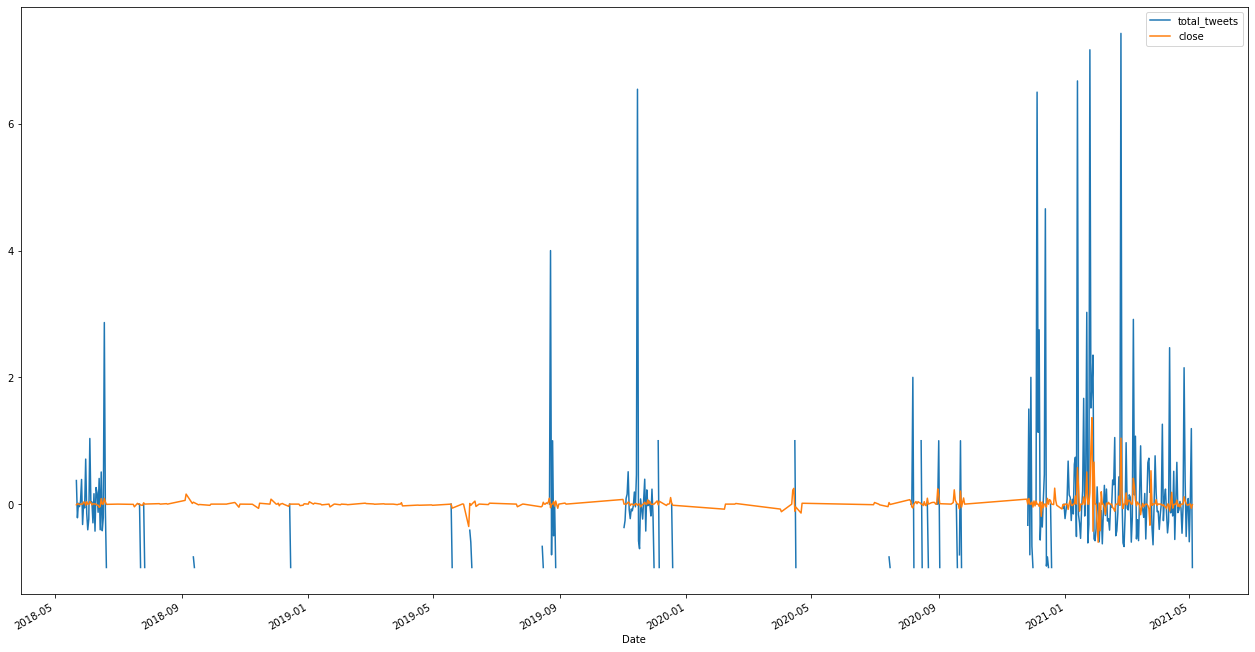

In [93]:
Social_GME_pct_plot  = Social_GME_data_pct.dropna() 
Social_GME_pct_plot.head()

Social_GME_pct_plot.plot()


<AxesSubplot:>

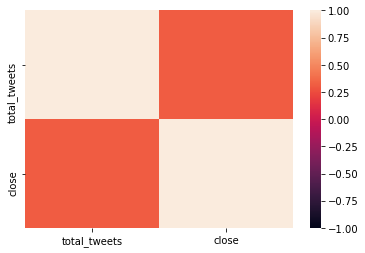

In [83]:
social_GME_corr = Social_GME_pct_plot.corr()

social_GME_corr

sns.heatmap(social_corr ,vmin=-1, vmax=1)

In [84]:
social_GME_corr

,total_tweets,close
total_tweets,1.000000,0.318736
close,0.318736,1.000000


In [85]:
GME_daily_return

Date
2018-05-22   -0.011751
2018-05-23    0.007531
2018-05-24    0.001574
2018-05-25   -0.007070
2018-05-29    0.033228
                ...   
2021-05-13    0.141783
2021-05-14   -0.030843
2021-05-17    0.128791
2021-05-18    0.000382
2021-05-19   -0.064987
Name: daily_return, Length: 754, dtype: float64

In [87]:
daily_returns_ewm = GME_daily_return.ewm(halflife=21).std()

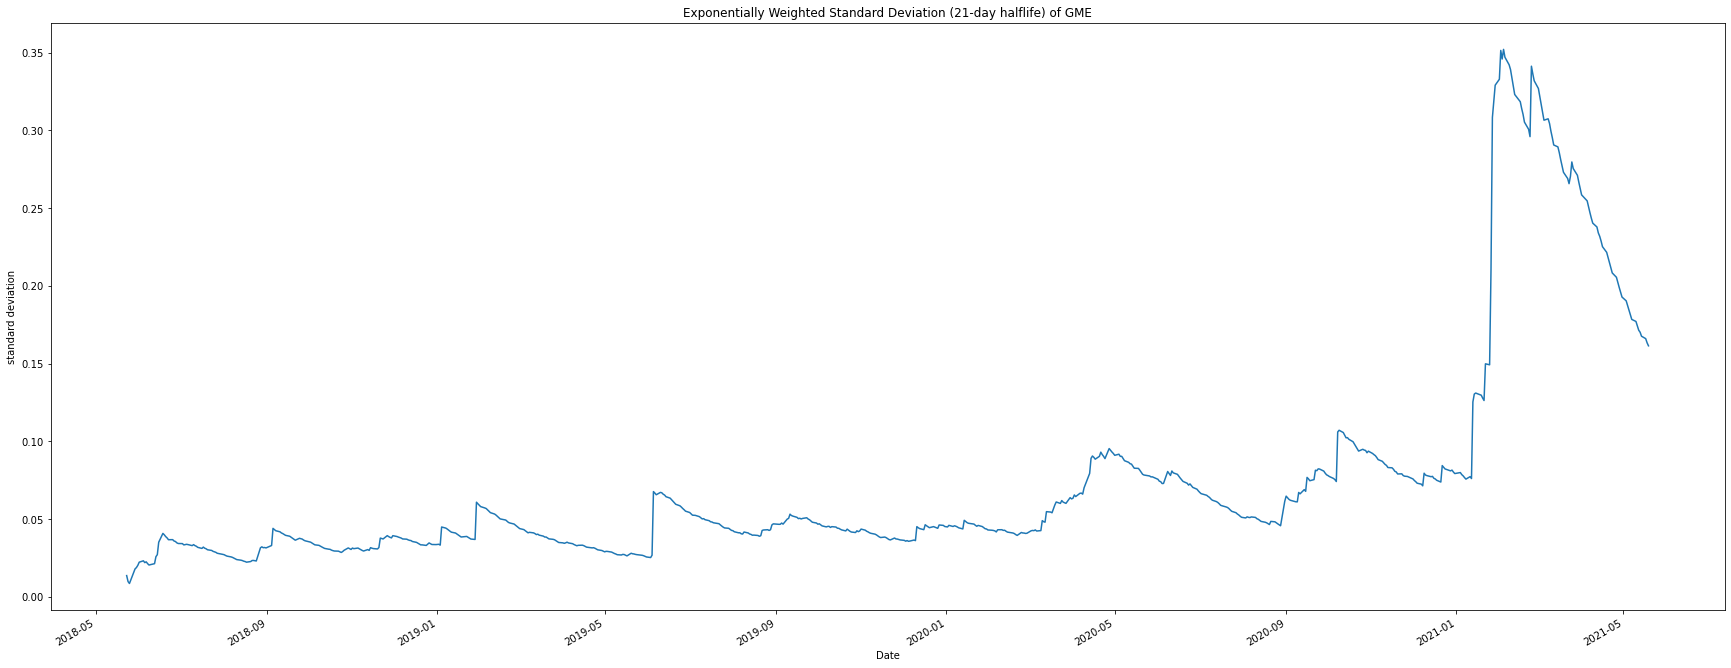

In [89]:

GME_ewm_std = daily_returns_ewm.plot(figsize=(30,12), title='Exponentially Weighted Standard Deviation (21-day halflife) of GME')
GME_ewm_std.set(ylabel='standard deviation')
plt.show()

In [ ]:
#group by absolute number of tweets / relationship to stock price (percent change of price) - absolute number of tweets as a proxy for interest in stock


In [114]:
Social_GME_data.head()

,total_tweets,close
Date,,
2018-05-21,301,12.765
2018-05-22,413,12.615
2018-05-23,324,12.710
2018-05-24,328,12.730
2018-05-25,315,12.640


In [134]:
Social_GME_data_index = Social_GME_data.reset_index().dropna() 

In [135]:
Social_GME_data_index

,Date,total_tweets,close
0,2018-05-21,301,12.765
1,2018-05-22,413,12.615
2,2018-05-23,324,12.710
3,2018-05-24,328,12.730
4,2018-05-25,315,12.640
...,...,...,...
1088,2021-05-13,0,164.999
1089,2021-05-14,0,159.910
1092,2021-05-17,0,180.505
1093,2021-05-18,0,180.574


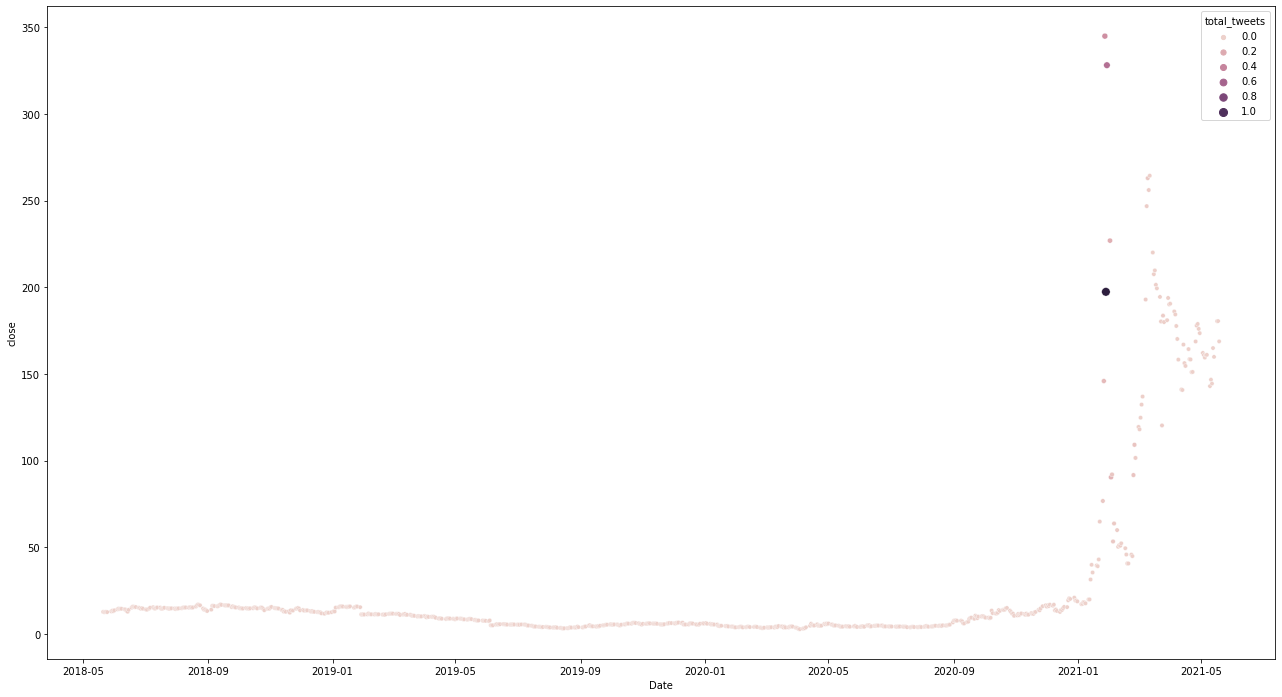

In [146]:
scatterplot_GME = sns.scatterplot(data=Social_GME_data_index, x="Date", y="close", size='total_tweets', hue="total_tweets")


In [ ]:
# Plots I want to use to tell the financial data story

#daily return plot
GME_return_plt

#Simulation plots pre and post stock price volatility
Sim_plot_prevolatility
Sim_plot_postvolatility

#Moving weighted average standard deviation plot to show volatility
GME_ewm_std

# Pct change correlation between Social mentions and Stock price changes
social_GME_corr

#Scatterplot graph showing a relationship between date / stock price and twitter mentions (Just need to adjust the x axis scale and show dates from 2019 onwards)
scatterplot_GME


